# 机器学习-前言介绍

### 监督学习（supervised Learning）

#### 特征

* 有输入数据X，输出数据Y标签

* 从正确的answer中学习，再用新的x输入预测

#### 类型

* Regresssion  回归
* classification 分类

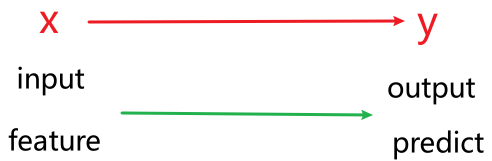

## 无监督学习(unsupervised Learning)

#### 定义
Data only comes with input x, but not output label y, Algorithm has to find **structure** in the data. 
在没有输出标签y的情况下，算法需要寻找数据中的**结构**，这通常是通过无监督学习（Unsupervised Learning）来实现的。无监督学习是一种让机器学习模型从输入数据中找出潜在结构或模式的方法，而不需要明确的标签或结果来指导学习过程。
#### 特征
* 仅有输入数据x，你没有正确的answer答案label
* 需要unsupervised Learning 自己找到某种“兴趣点”，即找到正确的answer答案label

#### 常见方法和技术
* 聚类
* 降维
* 异常检测

In [13]:
import numpy as np
import tensorflow as tf

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 数据预处理：将图像数据展平成一维向量，并将像素值归一化到0到1之间
def preprocess_data(images):
    images = images.reshape(images.shape[0], -1) / 255.0
    return images

# 定义逻辑回归模型
class LogisticRegression:
    def __init__(self, lr=0.01, num_iterations=1000):
        self.lr = lr
        self.num_iterations = num_iterations

    # 训练模型
    def fit(self, X, y):
        print(X,y)
        self.X = np.insert(X, 0, 1, axis=1)  # 添加偏置项
        self.y = y
        self.theta = np.zeros(self.X.shape[1])  # 初始化参数
        for _ in range(self.num_iterations):
            z = np.dot(self.X, self.theta)
            h = 1 / (1 + np.exp(-z))
            gradient = np.dot(self.X.T, (h - self.y)) / self.y.size
            self.theta -= self.lr * gradient

    # 预测
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        z = np.dot(X, self.theta)
        h = 1 / (1 + np.exp(-z))
        return (h >= 0.5).astype(int)

# 主函数
def main():
    # 数据预处理
    train_images_processed = preprocess_data(train_images)
    test_images_processed = preprocess_data(test_images)

    # 创建并训练逻辑回归模型
    lr_model = LogisticRegression(lr=0.1, num_iterations=1000)
    lr_model.fit(train_images_processed, train_labels)


    print(test_images_processed)
    # 对测试集进行预测
    predictions = lr_model.predict(test_images_processed)

    print(predictions)
    # 计算准确率
    accuracy = np.mean(predictions == test_labels)
    print("Accuracy:", accuracy)

if __name__ == "__main__":
    main()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 1 1 1]
Accuracy: 0.1135
